

# Project: Investigate a  European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
#import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3 as sq
from bs4 import BeautifulSoup
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


<ul>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessind</a></li>    
<li><a href="#clean">Cleaning</a></li>
</ul>

<a id='gather'></a>
# Gathering Data 
### phase 1 of data wrangling

In [2]:
#make a connection with sqlite database
conn=sq.connect('database.sqlite')
# type a quuery to select all columns and rows to store them in dataframe
df_country=pd.read_sql_query('select * from Country',conn)
#show the first two obesrvations from a table
df_country.head(2)

,id,name
0,1,Belgium
1,1729,England


In [3]:
df_League=pd.read_sql_query('select * from league',conn)
df_League.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [4]:
df_Match=pd.read_sql_query('select * from Match',conn)
df_Match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [5]:
df_Player=pd.read_sql_query('select * from Player',conn)
df_Player.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [6]:
df_Team=pd.read_sql_query('select * from Team',conn)
df_Team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [7]:
df_Teamattributes=pd.read_sql_query('select * from Team_Attributes',conn)
df_Teamattributes.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [8]:
df_Playerattributes=pd.read_sql_query('select * from Player_Attributes',conn)
df_Playerattributes.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [9]:
df_sqlitesequence=pd.read_sql_query('select * from sqlite_sequence',conn)
df_sqlitesequence.head(2)

,name,seq
0,Team,103916
1,Country,51958


<a id='assess'></a>
# Assessing
### phase 2 of data wrangling

## country Table asssess

In [10]:
#get the data types of columns of the Table
df_country.dtypes

id       int64
name    object
dtype: object

In [11]:
# print the number of observations
print('number of observations in country table:',df_country.shape[0])
# print the number of columns 
print('number of columns in country table:',df_country.shape[1])

number of observations in country table: 11
number of columns in country table: 2


In [12]:
# print the number of all null values
print('number of null values in country table:',df_country.isnull().sum().sum())
# print the number of all dublicated values
print('number of dublicated values in country table:',df_country.duplicated().sum())

number of null values in country table: 0
number of dublicated values in country table: 0


## League Table assess

In [13]:
df_League.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [14]:
print('number of observations in League table:',df_League.shape[0])
print('number of columns in League table:',df_League.shape[1])

number of observations in League table: 11
number of columns in League table: 3


In [15]:
print('number of null values in League table:',df_League.isnull().sum().sum())
print('number of dublicated values in league table:',df_League.duplicated().sum())

number of null values in League table: 0
number of dublicated values in league table: 0


## Match Table assess

In [16]:
print('number of observations in Match table:',df_Match.shape[0])
print('number of columns in Match table:',df_Match.shape[1])

number of observations in Match table: 25979
number of columns in Match table: 115


In [17]:
print('number of null values in Match table:',df_Match.isnull().sum().sum())

number of null values in Match table: 407395


In [18]:
print('number of dublicated values in Match table:',df_Match.duplicated().sum())

number of dublicated values in Match table: 0


## Team Table assess

In [19]:
print(df_Team.dtypes)
print('number of observations in Team table:',df_Team.shape[0])
print('number of columns in Team table:',df_Team.shape[1])
print('number of dublicated values in Team table:',df_Team.duplicated().sum())

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object
number of observations in Team table: 299
number of columns in Team table: 5
number of dublicated values in Team table: 0


In [20]:
print('number of null values in Team table:',df_Team.isnull().sum())

number of null values in Team table: id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


## Players Table assess

In [21]:
print(df_Player.dtypes)
print('number of observations in Player table:',df_Player.shape[0])
print('number of columns in Player table:',df_Player.shape[1])
print('number of dublicated values in Player table:',df_Player.duplicated().sum())
print('number of null values in Player table:',df_Player.isnull().sum().sum())

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object
number of observations in Player table: 11060
number of columns in Player table: 7
number of dublicated values in Player table: 0
number of null values in Player table: 0


## Player_Atributes Table Assess

In [22]:
print(df_Playerattributes.dtypes)

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [23]:
print(df_Playerattributes.isnull().sum().sum())

47301


In [24]:
print('number of observations in Player table:',df_Playerattributes.shape[0])
print('number of columns in Player table:',df_Playerattributes.shape[1])
print('number of dublicated values in Player table:',df_Playerattributes.duplicated().sum())

number of observations in Player table: 183978
number of columns in Player table: 42
number of dublicated values in Player table: 0


## Team_Atrributes Table assess

In [25]:
print(df_Teamattributes.dtypes)

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

In [26]:
print('number of null values in Player table:',df_Teamattributes.isnull().sum().sum())

number of null values in Player table: 969


In [27]:
print('number of observations in Player table:',df_Teamattributes.shape[0])
print('number of columns in Player table:',df_Teamattributes.shape[1])
print('number of dublicated values in Player table:',df_Teamattributes.duplicated().sum())

number of observations in Player table: 1458
number of columns in Player table: 25
number of dublicated values in Player table: 0


<a id='clean'></a>
# Data cleaning(based on the questions)
### phase 3 in data wrangling     

In [28]:
#cleaning with drop the columns i dont use them in analysis
df_Match.drop(df_Match.iloc[:,11:81],inplace=True,axis=1)

In [29]:
df_Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null  int64  
 10  away_team_goal    25979 non-null  int64  
 11  card              14217 non-null  object 
 12  cross             14217 non-null  object 
 13  corner            14217 non-null  object 
 14  possession        14217 non-null  object 
 15  B365H             22592 non-null  float64
 16  B365D             22592 non-null  float6

In [30]:
# parsing for card column to two lists 'card_home':cards that the home team taked
# and 'card_away' that the againest team taked
#i parsed the card column becausee i will use it in questions
home=0
away=0
card_home=list()
card_away=list()
for row in range(df_Match.shape[0]):
    if df_Match['card'][row]!=None:
        soup=BeautifulSoup(df_Match['card'][row])
        c=soup.find_all('team')
        for i in range(len(c)):
            if int(c[i].contents[0])==df_Match['home_team_api_id'][row]:
                  home=home+1
            elif int(c[i].contents[0])==df_Match['away_team_api_id'][row]:
                  away=away+1
    card_home.append(home)
    card_away.append(away)
    home=0
    away=0

In [31]:
#remove the card column that is in xml shape
df_Match.drop(columns=['card'],axis=1,inplace=True)

In [32]:
#insert the home_card list in datafram of match table
df_Match.insert(11,'home_card',card_home)

In [33]:
#remove rest of columns i won't use 
df_Match.drop(df_Match.iloc[:,12:45],inplace=True,axis=1)

In [34]:
#insert the away_card list in datafram of match table
df_Match.insert(11,'away_card',card_away)

In [35]:
# remove the sqlitesequence dataframe because i won't use it
df_sqlitesequence=None

<a id='eda'></a>
## Exploratory Data Analysis



## Questions
<ul>
<li><a href="#Question1">Question1</a></li>
<li><a href='#Question2'>Question2</a></li>
<li><a href='#Question3'>Question3</a></li>
<li><a href='#Question4'>Question4</a></li>
<li><a href='#Question5'>Question5</a></li>
</ul>
<ul>

<a id='Question1'></a>
# Question 1-what are the best teams over all the seasons?

In [36]:
#i will get the best team based on the number of goals 
#used match table to know the number of goals for each team in each season
home_team_goal=df_Match.groupby(['season','home_team_api_id'])['home_team_goal'].sum().reset_index()

In [37]:
maximum_home=home_team_goal.groupby('season').max().reset_index()

In [38]:
#searching function,,, search on the ids on a table based on ids in another table and print the name (player or team or ..) 
def searching_on_names(ids1,ids2,name):
    names=list()
    for i in range(len(ids2)):
        for j in range(len(ids1)):
            if ids1[j]==ids2[i]:
                names.append(name[j])
    return names

In [39]:
#searching on the names of teams are the best over all seasons based on number of goals their scored in home_teams
Teams_home=searching_on_names(df_Team['team_api_id'],maximum_home['home_team_api_id'],df_Team['team_long_name'])
maximum_home.insert(3,'team_name',Teams_home)
maximum_home

,season,home_team_api_id,home_team_goal,team_name
0,2008/2009,10281,61,Real Valladolid
1,2009/2010,10281,68,Real Valladolid
2,2010/2011,108893,61,AC Arles-Avignon
3,2011/2012,10269,73,VfB Stuttgart
4,2012/2013,10281,67,Real Valladolid
5,2013/2014,158085,64,FC Arouca
6,2014/2015,274581,65,Royal Excel Mouscron
7,2015/2016,274581,70,Royal Excel Mouscron


In [40]:
#used match table to know the number of goals for each team in each season in away teams
away_team_goal=df_Match.groupby(['season','away_team_api_id'])['away_team_goal'].sum().reset_index()
maximum_away=away_team_goal.groupby('season').max().reset_index()

In [41]:
#searching on the names of teams are the best over all seasons based on number of goals their scored in away_teams
Teams_away=searching_on_names(df_Team['team_api_id'],maximum_away['away_team_api_id'],df_Team['team_long_name'])
maximum_away.insert(3,'team_name',Teams_away)
maximum_away

,season,away_team_api_id,away_team_goal,team_name
0,2008/2009,10281,44,Real Valladolid
1,2009/2010,10281,42,Real Valladolid
2,2010/2011,108893,49,AC Arles-Avignon
3,2011/2012,10269,51,VfB Stuttgart
4,2012/2013,10281,52,Real Valladolid
5,2013/2014,158085,52,FC Arouca
6,2014/2015,274581,53,Royal Excel Mouscron
7,2015/2016,274581,47,Royal Excel Mouscron


In [42]:
#print the top teams overall seasons 
maximum_away

,season,away_team_api_id,away_team_goal,team_name
0,2008/2009,10281,44,Real Valladolid
1,2009/2010,10281,42,Real Valladolid
2,2010/2011,108893,49,AC Arles-Avignon
3,2011/2012,10269,51,VfB Stuttgart
4,2012/2013,10281,52,Real Valladolid
5,2013/2014,158085,52,FC Arouca
6,2014/2015,274581,53,Royal Excel Mouscron
7,2015/2016,274581,47,Royal Excel Mouscron


<a id='Question2'></a>
# Question 2-which 10 Players had the most penalties?

In [43]:
#use the player_attributes table to know which id_players had the most potential
most_penalties=df_Playerattributes.groupby('player_api_id')['penalties'].sum().reset_index()
most_penalties_sorted=most_penalties.sort_values('penalties',ascending=False,axis=0,ignore_index=True).iloc[0:10,:]
most_penalties_sorted

,player_api_id,penalties
0,41269,4314.0
1,108808,4120.0
2,41890,3984.0
3,26472,3813.0
4,25772,3799.0
5,30731,3791.0
6,27734,3767.0
7,30626,3712.0
8,40930,3682.0
9,47394,3650.0


In [44]:
#searching on names of player that had the most potential
players_name=searching_on_names(df_Player['player_api_id'],most_penalties_sorted['player_api_id'],df_Player['player_name'])
most_penalties_sorted.insert(2,'Player_name',players_name)

Text(0.5, 1.0, 'the most 10 players had penalties')

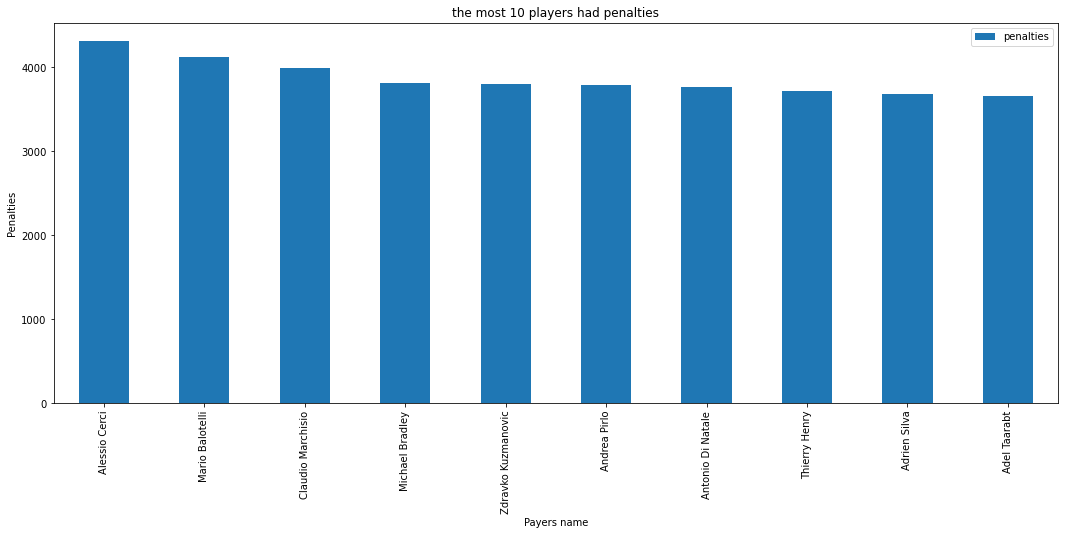

In [45]:
#print Players had the most potential
most_penalties_sorted.plot.bar(x='Player_name',y='penalties',figsize=(18,7))
plt.xlabel('Payers name')
plt.ylabel('Penalties')
plt.title('the most 10 players had penalties')

<a id='Question3'></a>
# Question 3-Team attributes lead to most victories

In [46]:
#based on the best teams that i get in question 1 i print the most frequntly attributes of them.
attributes=list()
for team in range(len(df_Teamattributes)):
    if df_Teamattributes['team_api_id'][team]==maximum_home['home_team_api_id'][0]:
        attributes.append(df_Teamattributes.iloc[team,:])
    
df_attributes=pd.DataFrame(attributes)

In [47]:
df_attributes.drop(columns=['id','team_fifa_api_id','team_api_id','date'],axis=1,inplace=True)

In [48]:
#print the most frequntly attributes of best teams
attributes_of_best_team=pd.DataFrame(df_attributes.mode().iloc[0,:])

In [49]:
attributes_of_best_team.columns=['attributes']

In [50]:
#print the attributes that lead to most victories
attributes_of_best_team

,attributes
buildUpPlaySpeed,55
buildUpPlaySpeedClass,Balanced
buildUpPlayDribbling,40
buildUpPlayDribblingClass,Little
buildUpPlayPassing,54
buildUpPlayPassingClass,Mixed
buildUpPlayPositioningClass,Organised
chanceCreationPassing,58
chanceCreationPassingClass,Normal
chanceCreationCrossing,73


<a id='Question4'></a>
# Question 4-is there coreelation between the number of cards and the outcomes of the match ?

In [51]:
# classified the outcomes of each team im match to ['win','lose','equality']
home_outcomes=list()
away_outcomes=list()
for i in range(len(df_Match['home_team_goal'])):
    if df_Match['home_team_goal'][i] > df_Match['away_team_goal'][i]:
        home_outcomes.append('win')
        away_outcomes.append('lose')
    elif df_Match['home_team_goal'][i] < df_Match['away_team_goal'][i]:
        away_outcomes.append('win')
        home_outcomes.append('lose')
    else:
        away_outcomes.append('equality')
        home_outcomes.append('equality')
df_Match.insert(10,'home_outcomes',home_outcomes)
df_Match.insert(12,'away_outcomes',away_outcomes)

In [52]:
all_outcomes=list()
all_cards=list()
all_outcomes=pd.concat([df_Match['home_outcomes'],df_Match['away_outcomes']],axis=0)
all_cards=pd.concat([df_Match['home_card'],df_Match['away_card']])

In [53]:
df=pd.concat([all_cards,all_outcomes],axis=1)
df['number_of_matchs']=np.repeat(1,all_cards.size)

In [54]:
df.rename(columns={0:'all_cards',1:'all_outcomes'},inplace=True)

In [55]:
df=df.groupby(['all_cards','all_outcomes']).count().reset_index()

In [56]:
df.head(3)

,all_cards,all_outcomes,number_of_matchs
0,0,equality,6727
1,0,lose,9762
2,0,win,10351


In [57]:
#convert the values of all_outcomes column to columns and their values are the number of times reapeted in each card_number
cards_outcomes=df.pivot_table(index='all_cards',columns='all_outcomes',values='number_of_matchs')

In [58]:
#rename the columns
cards_outcomes.columns=['equality','lose','win']
cards_outcomes.fillna(0,inplace=True)
cards_outcomes

,equality,lose,win
all_cards,,,
0,6727.0,9762.0,10351.0
1,1655.0,2260.0,2990.0
2,1978.0,2890.0,2755.0
3,1468.0,2245.0,1864.0
4,841.0,1336.0,871.0
5,375.0,569.0,381.0
6,114.0,223.0,126.0
7,24.0,70.0,30.0
8,6.0,16.0,13.0


Text(0, 0.5, 'Match_Outcomes')

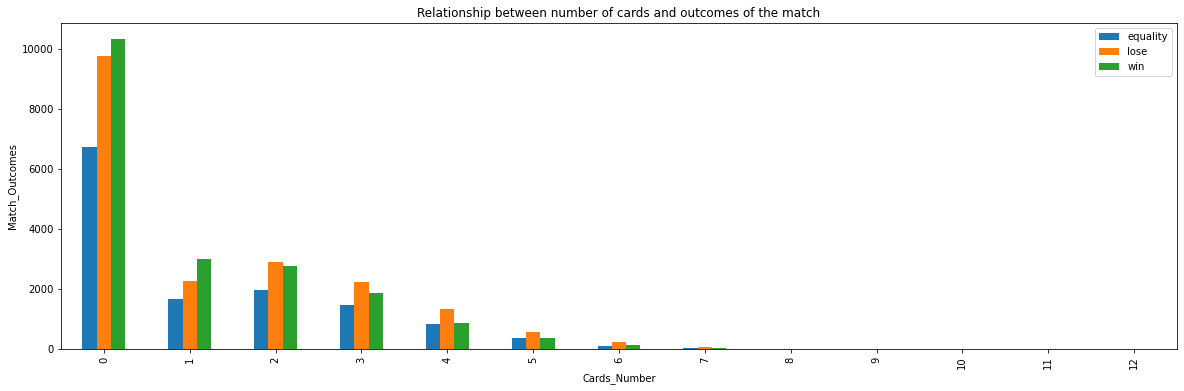

In [59]:
#show the relationship 
cards_outcomes.plot(kind='bar',figsize=(20,6))
plt.title('Relationship between number of cards and outcomes of the match')
plt.xlabel('Cards_Number')
plt.ylabel('Match_Outcomes')

<a id='Question5'></a>
# Question 5-what the top 6 players in 2016 ?

In [60]:
# convert the date column to datetime to extract the year
df_Playerattributes['date']=pd.to_datetime(df_Playerattributes['date'])
df_Playerattributes['year']=df_Playerattributes['date'].dt.year

In [61]:
#filter the table of player attributes in 2016 
df_in_2016=df_Playerattributes.query('year==2016')
all_ids=df_in_2016.groupby('player_api_id')['overall_rating'].mean().reset_index()

In [62]:
all_ids.sort_values(ascending=False,inplace=True,by="overall_rating",ignore_index=True)
all_ids=all_ids.iloc[0:6,:]


In [63]:
#searching on the name of the 6 top players in 2016 based on ids 
name_of_player=searching_on_names(df_Player['player_api_id'],all_ids['player_api_id'],df_Player['player_name'])
all_ids.insert(1,'player_name',name_of_player)
the_top_6=all_ids

In [64]:
#print the top 6 players in 2016
the_top_6

,player_api_id,player_name,overall_rating
0,27299,Manuel Neuer,90.0
1,19533,Neymar,90.0
2,30834,Arjen Robben,89.0
3,37412,Sergio Aguero,88.0
4,36378,Mesut Oezil,88.0
5,107417,Eden Hazard,88.0


<a id='conclusions'></a>
## Conclusions



### 1-the data set i used is *European Soccer Dataset* that contains 8 tables ,, there are relationships among them, to get these tables from sqlite database i maked a connection then wrote query to extract each table and load it in a Datafram.
### 2-maked assessing on each table to understand an discover the the dirty and messy data.
### 3-cleaning match table ,, removed the columns that i won't use and maked parsing for card column for each team in the match then, i removed the sqlitesequence table because i wouldn't use it.
### 4- exploratory data analysis section , i have 5 questions to analysis them,,i described them in a pdf

# References
https://www.kaggle.com

https://pandas.pydata.org/docs

https://www.youtube.com/watch?v=E7aY1XJX1og

https://www.kaggle.com/hugomathien/soccer/discussion/80756